#**Tecnológico de Monterrey**

##**Ciencia y Analítica de Datos**

##**Profesor Titular:** Dra. María de la Paz Rico Fernández
##**Profesor Tutor:** Roberto Antonio Guevara González

###**Actividad Semanal -- 7 Regresiones y K means**
####**Notebook 1. Regresión.**

##**Alumno:** Alan Avelino Fernández Juárez

##**Matrícula:** A00989308

##**Fecha: 09/11/2022**

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_validate,RepeatedKFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

##Notebook 1. Regresión. 

###Ejercicio 1. Costo en la industria de manufactura.


In [2]:
#Obtenemos nuestro set de datos y se lo asignamos a un DataFrame, aplicamos un describe para visualizar los datos estadísticos más relevantes
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [3]:
#Definimos 'X' y 'y'
X = df[['Number of Units']]
y = df['Manufacturing Cost']

# Realizamos el train_test_split para partir nuestro df en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Tamaño de las variables de entrada y salida sin partición (X & y)")
print(X.shape, y.shape)

print("Tamaño de los valores de entrenamiento (X_train & Y_train)")
print(X_train.shape, y_train.shape)

print("Tamaño de los valores de prueba (X_test & Y_test)")
print(X_test.shape, y_test.shape)

Tamaño de las variables de entrada y salida sin partición (X & y)
(1000, 1) (1000,)
Tamaño de los valores de entrenamiento (X_train & Y_train)
(900, 1) (900,)
Tamaño de los valores de prueba (X_test & Y_test)
(100, 1) (100,)


####**Regresión Lineal**

In [4]:
#Creamos un objeto de nuestro modelo LinearRegression
mod_lr = LinearRegression(fit_intercept=True)

#Entrenamos nuestro conjunto de datos con el modelo
mod_lr.fit(X_train, y_train)

#Se obtiene la predicción con el conjunto de datos prueba
y_fit = mod_lr.predict(X_test)

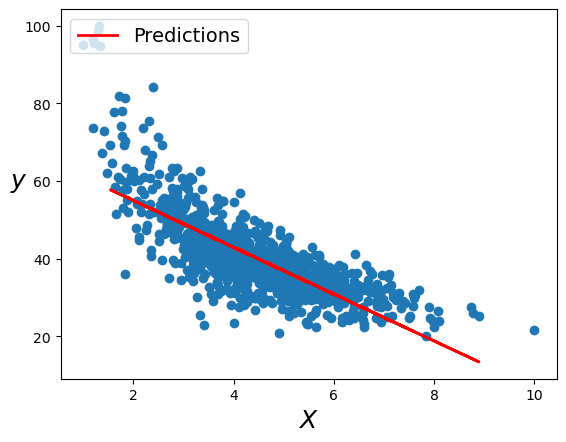

In [5]:
#Gráfica Inicial del conjunto de datos
plt.scatter(X, y)
plt.plot(X_test, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [7]:
mod_lr.coef_, mod_lr.intercept_

(array([-6.03357276]), 67.03883293539208)

In [8]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit)))
print('r2_score',r2_score(y_test, y_fit))

Error medio Absoluto (MAE): 4.581575620531286
Root Mean Squared Error: 5.820691087508853
r2_score 0.6544705154382864


####**Regresión Polinomial**

In [9]:
#Aplicamos la transformación Polinomial al conjunto de datos de entrenamiento
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)


#Creamos el objeto y entrenamos nuestro conjunto de datos con el modelo
mod_poly = LinearRegression(fit_intercept=True)
mod_poly.fit(X_poly, y_train)

#Se obtiene la predicción con el conjunto de datos prueba
X_test_poly = poly_features.fit_transform(X_test)
y_fit_poly = mod_poly.predict(X_test_poly)

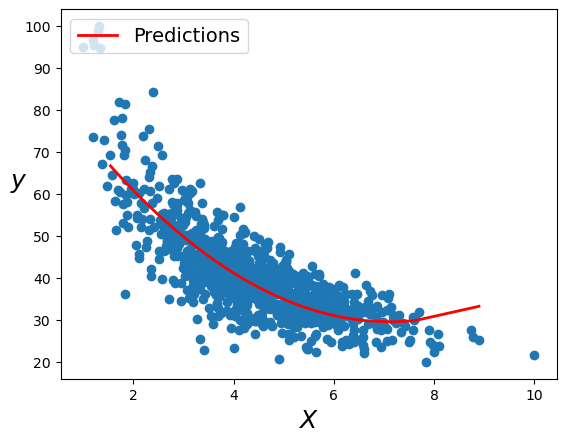

In [10]:
#Gráfica Inicial del conjunto de datos
plt.scatter(X, y)

order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = y_fit_poly[order]

plt.plot(sortedX, sorted_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [11]:
#Obtenemos 
mod_poly.coef_, mod_poly.intercept_

(array([-16.95147175,   1.18852154]), 89.97388061400441)

In [12]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_poly))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_poly)))
print('r2_score',r2_score(y_test, y_fit_poly))

Error medio Absoluto (MAE): 4.070921827959764
Root Mean Squared Error: 5.101935770152971
r2_score 0.734535786409742


####**Ridge**

In [13]:
#Creamos el objeto y entrenamos nuestro conjunto de datos con el modelo
mod_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 0.1, solver = 'cholesky', random_state = 42))])
mod_ridge.fit(X_train, y_train)

#Se obtiene la predicción con el conjunto de datos prueba
y_fit_ridge = mod_ridge.predict(X_test)

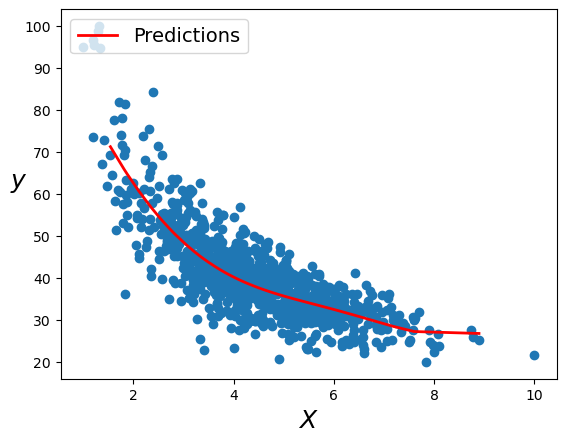

In [14]:
#Gráfica Inicial del conjunto de datos
plt.scatter(X, y)

order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = y_fit_ridge[order]

plt.plot(sortedX, sorted_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [15]:
#Obtenemos 
mod_ridge['ridge'].coef_, mod_ridge['ridge'].intercept_

(array([-41.68968858,  40.52300361,  13.29664119, -11.81451058,
        -14.69993179,  -5.76593356,   3.09844512,   6.81167005,
          5.80447654,   2.56050338,  -0.66668177,  -2.59789299,
         -2.83009109,  -1.49918295,   1.01824367]),
 40.02356938918902)

In [16]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_ridge))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_ridge)))
print('r2_score',r2_score(y_test, y_fit_ridge))

Error medio Absoluto (MAE): 4.03360238492304
Root Mean Squared Error: 4.998383925798769
r2_score 0.7452024590935149


####**Lasso**

In [17]:
#Creamos el objeto y entrenamos nuestro conjunto de datos con el modelo
mod_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 3, random_state = 42))])
mod_lasso.fit(X_train, y_train)

#Se obtiene la predicción con el conjunto de datos prueba
y_fit_lasso = mod_lasso.predict(X_test)

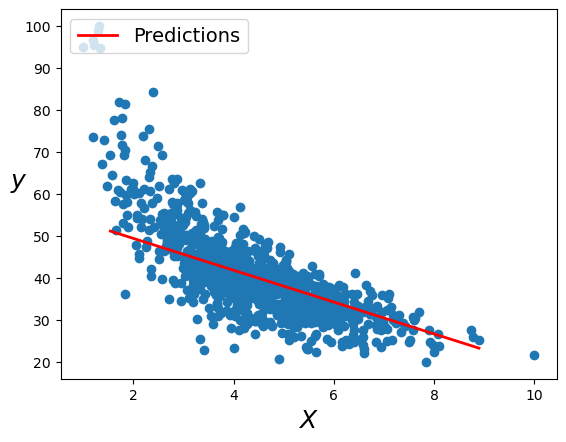

In [18]:
#Gráfica Inicial del conjunto de datos
plt.scatter(X, y)

order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = y_fit_lasso[order]

plt.plot(sortedX, sorted_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [19]:
#Obtenemos 
mod_lasso['lasso'].coef_, mod_lasso['lasso'].intercept_

(array([-5.06269176, -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 40.02356938918891)

In [20]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_lasso)))
print('r2_score',r2_score(y_test, y_fit_lasso))

Error medio Absoluto (MAE): 4.962253808305811
Root Mean Squared Error: 6.539638635015047
r2_score 0.5638423325391557


####**Gráfica los errores**

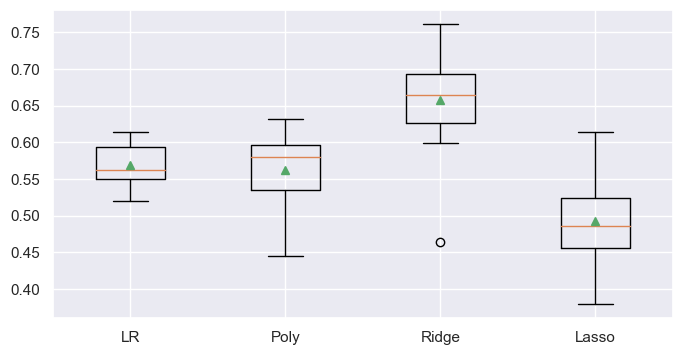

In [34]:
resultados = list()

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
metricas = {"R2":"r2", "MAE":"neg_mean_absolute_error"}
mods = ["LR", "Poly", "Ridge", "Lasso"]

sc_lr = cross_validate(mod_lr, X_train, y_train, scoring=metricas, cv=kfold)
resultados.append(sc_lr)

sc_poly = cross_validate(mod_poly, X_train, y_train, scoring=metricas, cv=kfold)
resultados.append(sc_poly)

sc_ridge = cross_validate(mod_ridge, X_train, y_train, scoring=metricas, cv=kfold)
resultados.append(sc_ridge)

sc_lasso = cross_validate(mod_lasso, X_train, y_train, scoring=metricas, cv=kfold)
resultados.append(sc_lasso)

sns.set(rc={'figure.figsize':(8,4)})

lst_r2=list()

for i in range(len(resultados)):
  rr = resultados[i]['test_R2']
  lst_r2.append(rr)

plt.boxplot(lst_r2, labels=mods, showmeans=True)

plt.show()

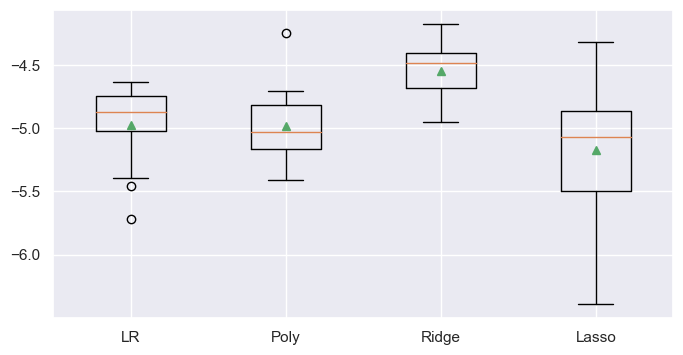

In [35]:
lst_mae=list()

for i in range(len(resultados)):
  mae = resultados[i]['test_MAE']
  lst_mae.append(mae)

plt.boxplot(lst_mae, labels=mods, showmeans=True)

plt.show()

¿Que método conviene más a la empresa? 
  El método que conviene más a la empresa en el Ridge.
  
  ¿por que?
    Porque fue el que mejor evaluación tuvo dentro de los 4 modelos.
  
¿Que porcentajes de entrenamiento y evaluación usaste?
El porcentaje de Entrenamiento que utilicé fue de 90% y el de evaluación 10%.

¿Que error tienes? 
  Error medio Absoluto (MAE): 4.03360238492304
  Root Mean Squared Error: 4.998383925798769
  r2_score 0.7452024590935149

###Ejercicio 2. Regresión múltiple.

In [36]:
df_rm = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df_rm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [37]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [38]:
df_rm.drop('id', axis = 1, inplace = True)
df_rm.drop('date', axis = 1, inplace = True)
df_rm.drop('zipcode', axis = 1, inplace = True)
df_rm.drop('lat', axis = 1, inplace = True)
df_rm.drop('long', axis = 1, inplace = True)

df_rm.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [39]:
columnas = df_rm.columns.drop('price')

X = df_rm[columnas]
y = df_rm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=42)

print("Tamaño de las variables de entrada y salida sin partición (X & y)")
print(X.shape, y.shape)

print("Tamaño de los valores de entrenamiento (X_train & Y_train)")
print(X_train.shape, y_train.shape)

print("Tamaño de los valores de prueba (X_test & Y_test)")
print(X_test.shape, y_test.shape)

Tamaño de las variables de entrada y salida sin partición (X & y)
(21613, 15) (21613,)
Tamaño de los valores de entrenamiento (X_train & Y_train)
(19451, 15) (19451,)
Tamaño de los valores de prueba (X_test & Y_test)
(2162, 15) (2162,)


####**Regresión Lineal Múltiple**

In [40]:
#Creamos el modelo desde el constructor y ajustamos para X_train y y_train, al final predecimos sobre X_test
mod_rlm = LinearRegression(fit_intercept=True)
mod_rlm.fit(X_train,y_train)

y_fit_rlm = mod_rlm.predict(X_test)

In [41]:
# Se obtiene su Valores
print(mod_rlm.coef_.ravel(), mod_rlm.intercept_)

[-4.00585523e+04  4.89033829e+04  1.09465206e+02 -2.52589790e-02
  2.49744790e+04  5.64105706e+05  4.30257732e+04  1.84381540e+04
  1.18273285e+05  5.20639730e+01  5.74012340e+01 -3.57698228e+03
  9.82630704e+00  2.45421870e+01 -5.31614381e-01] 6221342.802546593


In [42]:
#Obtenemos los errores
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_rlm))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, y_fit_rlm)))
print('R2_score', r2_score(y_test, y_fit_rlm))

Error medio Absoluto (MAE): 143442.02866793738
Root Mean Squared Error : 226877.74290228297
R2_score 0.646665069185899


####**Regresión Múltiple Polinomial.**

In [43]:
#Aplicamos la transformación Polinomial al conjunto de datos de entrenamiento
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_plym = poly_features.fit_transform(X_train)


#Creamos el objeto y entrenamos nuestro conjunto de datos con el modelo
mod_plym = LinearRegression(fit_intercept=True)
mod_plym.fit(X_plym, y_train)

#Se obtiene la predicción con el conjunto de datos prueba
X_test_plym = poly_features.fit_transform(X_test)
y_fit_plym = mod_plym.predict(X_test_plym)


In [44]:
# Se obtiene su Valores
print(mod_plym.coef_.ravel(), mod_plym.intercept_)

[ 8.52724280e+05 -1.11751250e+06 -2.06561653e+02 -4.22604256e+01
 -2.02725524e+06 -4.40431203e+06 -1.02881658e+05  5.45097490e+05
  1.16211256e+06 -4.71249185e+02 -4.73821290e+02 -8.24165855e+04
 -3.27793702e+03  3.95808312e+03 -1.17938844e+01  9.81274225e+02
  2.99520181e+03 -9.62410174e+00  2.84711922e-01  1.50036109e+04
 -1.26819926e+04 -2.67122502e+02 -4.07486027e+03 -2.84795948e+03
 -5.88955322e+00 -1.63108922e+01 -4.38059048e+02 -7.71623516e+00
  1.69925111e+01  1.63078123e-02 -7.34947433e+03  2.28845622e+01
 -5.99467659e-01 -2.86199053e+04 -2.44397842e+03  1.09498709e+04
  2.15023656e+03  1.62888313e+04  2.23436121e+01  2.54954625e-01
  5.26783984e+02 -1.87545753e+01 -2.10710613e+01  4.09434389e-01
  6.15457110e+02 -1.12359031e+03 -8.61101844e+00  1.75259427e+02
 -1.31211657e+01  5.63853575e+00  2.23614956e+01 -7.85698218e+02
 -1.51569966e+02  6.37666609e+01  1.51447114e+01  1.60001714e+02
 -1.66741949e+03  1.13702845e-06 -4.52191051e-02 -3.17803927e-01
  9.08128182e-02  3.92489

In [45]:
#Obtenemos los errores
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_plym))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_plym)))
print('r2_score',r2_score(y_test, y_fit_plym))

Error medio Absoluto (MAE): 131378.63314138394
Root Mean Squared Error: 223119.08781086915
r2_score 0.6582754033147254


**Ridge Múltiple**

In [46]:
#Creamos el objeto y entrenamos nuestro conjunto de datos con el modelo
mod_ridgem = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 0.1, solver = 'cholesky', random_state = 42))])
mod_ridgem.fit(X_train, y_train)

#Se obtiene la predicción con el conjunto de datos prueba
y_fit_ridgem = mod_ridgem.predict(X_test)

In [47]:
# Se obtiene su Valores
mod_ridgem['ridge'].coef_, mod_ridgem['ridge'].intercept_

(array([ 6.63395848e+05, -8.25963770e+05, -1.39366357e+05, -1.36237396e+06,
        -8.60791097e+05, -3.47786630e+05, -7.52203778e+03,  4.64034679e+05,
         1.07281944e+06, -1.37511908e+05, -3.16751936e+04, -1.68965675e+06,
        -1.01061870e+06,  2.20008663e+06, -4.45874559e+05,  1.01959583e+04,
         7.16943113e+03, -3.76305647e+04,  3.38767160e+04,  3.66422402e+04,
        -4.46994948e+03, -5.95454905e+02, -1.26835779e+04, -2.70727480e+04,
        -2.95990831e+04, -3.22082485e+04, -6.79159379e+05, -8.65721719e+03,
         6.15586190e+04,  3.70226998e+03, -2.45520210e+04,  8.23527989e+04,
        -6.07123157e+04, -5.89706583e+04, -2.27356326e+02,  2.43972953e+04,
         3.29094416e+03,  1.22412363e+05,  9.43631805e+04,  4.64478405e+03,
         7.94093175e+05, -1.86315487e+04, -6.89113674e+04,  2.82963429e+04,
         4.72576721e+03, -4.02431132e+04, -2.85508484e+04,  3.90176427e+04,
        -2.14664439e+04,  6.71970272e+03,  1.78147731e+05,  7.35545991e+03,
        -4.7

In [48]:
#Obtenemos los errores
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_ridgem))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_ridgem)))
print('r2_score',r2_score(y_test, y_fit_ridgem))

Error medio Absoluto (MAE): 131096.53461649796
Root Mean Squared Error: 222525.633077683
r2_score 0.6600908318286757


**Lasso Múltiple**

In [50]:
#Creamos el objeto y entrenamos nuestro conjunto de datos con el modelo
mod_lassom = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 3, random_state = 42))])
mod_lassom.fit(X_train, y_train)

#Se obtiene la predicción con el conjunto de datos prueba
y_fit_lassom = mod_lassom.predict(X_test)

/Users/alanfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.124e+14, tolerance: 2.598e+11
  model = cd_fast.enet_coordinate_descent(


In [51]:
# Se obtiene su Valores
mod_lassom['lasso'].coef_, mod_lassom['lasso'].intercept_

(array([ 116095.92616388,  139694.08985013,   73737.50215787,
        -129059.19875423,  -44717.5651753 ,   28711.49481316,
          72444.4621226 ,   59492.75045483,  221297.30154496,
        -145185.95313169,  -30627.26733718, -111198.63363486,
        -104861.73480945,   73974.42351055,    9554.97342497,
          11246.10616522,  -28140.06500015,  -62607.47969853,
           8603.1245881 ,   33771.64802222,   -6971.11920694,
              0.        ,   -4995.37996637,  -15310.32361323,
          -2221.95002989,  -10889.96736451, -132639.11158515,
           1403.49972746,   66059.69559548,   11703.25850746,
           9529.43723914,  192021.95861679,  -35658.55653614,
         -58924.67519884,    5188.51224051,   25600.89644076,
         -47296.34360809,  104426.11638961,    1142.62234752,
         -43660.58922492, -115530.547851  ,  -28964.02643379,
        -105316.21923004,   29002.32272838,   75827.62841649,
         -18506.40833382,   -1557.4183394 ,  -24447.79362354,
        

In [52]:
#Obtenemos los errores
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_lassom))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_lassom)))
print('r2_score',r2_score(y_test, y_fit_lassom))

Error medio Absoluto (MAE): 132021.29381776456
Root Mean Squared Error: 223275.63621022878
r2_score 0.6577957024816558


**Gráficas**

/Users/alanfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.534e+14, tolerance: 2.119e+11
  model = cd_fast.enet_coordinate_descent(
/Users/alanfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.499e+14, tolerance: 2.094e+11
  model = cd_fast.enet_coordinate_descent(
/Users/alanfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

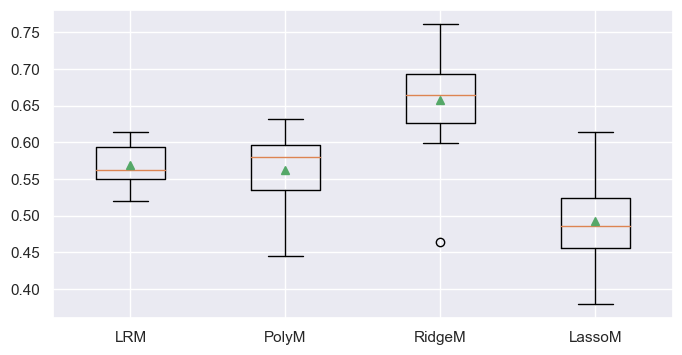

In [53]:
resm = list()

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
metricas = {"R2":"r2", "MAE":"neg_mean_absolute_error"}
mods = ["LRM", "PolyM", "RidgeM", "LassoM"]

sc_rlm = cross_validate(mod_rlm, X_train, y_train, scoring=metricas, cv=kfold)
resm.append(sc_rlm)

sc_plym = cross_validate(mod_plym, X_train, y_train, scoring=metricas, cv=kfold)
resm.append(sc_plym)

sc_ridgem = cross_validate(mod_ridgem, X_train, y_train, scoring=metricas, cv=kfold)
resm.append(sc_ridgem)

sc_lassom = cross_validate(mod_lassom, X_train, y_train, scoring=metricas, cv=kfold)
resm.append(sc_lassom)

sns.set(rc={'figure.figsize':(8,4)})

lst_r2=list()

for i in range(len(resm)):
  rr = resultados[i]['test_R2']
  lst_r2.append(rr)

plt.boxplot(lst_r2, labels=mods, showmeans=True)

plt.show()

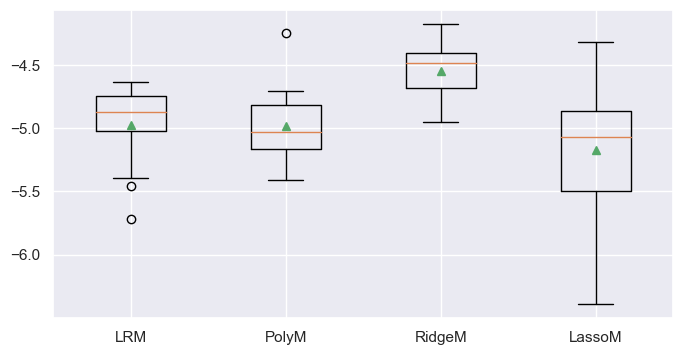

In [54]:
lst_mae=list()

for i in range(len(resultados)):
  mae = resultados[i]['test_MAE']
  lst_mae.append(mae)

plt.boxplot(lst_mae, labels=mods, showmeans=True)

plt.show()

¿Que método conviene más a la empresa? 
  El método que conviene más a la empresa en el Ridge.
  
  ¿por que?
    Porque fue el que mejor evaluación tuvo dentro de los 4 modelos.
  
¿Que porcentajes de entrenamiento y evaluación usaste?
El porcentaje de Entrenamiento que utilicé fue de 90% y el de evaluación 10%.

¿Que error tienes? 
  Error medio Absoluto (MAE): 131096.53461649796
  Root Mean Squared Error: 222525.633077683
  r2_score 0.6600908318286757